In [ ]:
!pip install aed-utilities

# 4 Estructuras de datos elementales

Los sistemas o métodos de organización de datos que permiten un almacenamiento eficiente de la información en la memoria del computador son conocidos como estructuras de datos. Estos métodos de organización constituyen las piezas básicas para la construcción de algoritmos complejos, y permiten implementarlos de manera eficiente.

En el presente capítulo se presentan las estructuras de datos básicas como son arreglos, listas enlazadas y árboles, con las cuales se implementarán posteriormente los _tipos de datos abstractos_.

## Arreglos

Un arreglo es una secuencia contigua en memoria, que almacena un número fijo de elementos homogéneos. En la siguiente figura se muestra un arreglo de enteros con 10 elementos:

![ejemplo-arreglo](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/ejemplo-arreglo.png?raw=1)

Una ventaja que tienen los arreglos es que el costo de acceso a un elemento dado del arreglo es constante, es decir no hay diferencias de costo entre accesar el primer, el último o cualquier elemento del arreglo, lo cual es muy eficiente. La desventaja es que es necesario definir a priori el tamaño del arreglo, lo cual puede generar mucha pérdida de espacio en memoria si se definen arreglos muy grandes para contener conjuntos pequeños de elementos.

Esta característica de costo de acceso constante es esencial para la eficiencia de algunos algoritmos muy importantes, como por ejemplo el siguiente:

### Ejemplo: Búsqueda Binaria

Supongamos que queremos buscar un elemento $x$ en un arreglo $a$ de tamaño $n$. Si no tenemos más información sobre el orden de los elementos dentro del arreglo, lo único que podemos hacer es una *búsqueda secuencial*, la cual tiene costo $\Theta(n)$ tanto en el peor caso como en el caso promedio.

Pero si sabemos que los elementos están en orden ascendente, existe una forma mucho más eficiente, llamada *búsqueda binaria*.

La idea es comparar primero $x$ conta el elemento del centro del arreglo. Si tenemos suerte, lo encontramos ahí, pero incluso si no tenemos suerte, podemos de inmediato descartar la mitad del arreglo. En efecto, si $x$ es mayor que el elemento del centro, entonces basta seguir buscando en la segunda mitad. De la misma manera, si $x$ es menor, basta seguir buscando en la primera mitad.

In [ ]:
import numpy as np
a=np.array([12,25,29,34,45,53,59,67,86,92])

In [ ]:
# Búsqueda binaria, versión iterativa
# busca x en el arreglo a, retorna subíndice o -1 si no está
def bbin(x,a):
    n=len(a)
    i=0
    j=n-1
    while i<=j:
        k=(i+j)//2
        if x==a[k]:
            return k
        if x<a[k]:
            j=k-1
        else:
            i=k+1
    return -1

In [ ]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


---

### Una manera más eficiente de programar la búsqueda binaria

En el análisis anterior, hemos considerado que en cada iteración, el costo de accesar el elemento $a[k]$ es igual a $1$, representando así el costo total de comparar primero con`==`y luego con `<`.
Si quisiéramos hacer una contabilidad más precisa, deberíamos decir que ese costo es en realidad de $2$ comparaciones por cada iteración.
A continuación veremos que es posible reducir eso a $1$ comparación por ciclo, si utilizamos comparaciones de tipo `<=`:

In [ ]:
# Búsqueda binaria, versión iterativa y con <=
# busca x en el arreglo a, retorna subíndice o -1 si no está
def bbin(x,a):
    n=len(a)
    i=0
    j=n-1
    while i<j: # conjunto tiene al menos 2 elementos
        k=(i+j)//2
        if x<=a[k]:
            j=k    # x estaría en a[i],...,a[k]
        else:
            i=k+1  # x estaría en a[k+1],...,a[j]
    # al terminar, el conjunto factible se ha reducido a 0 o 1 elemento
    if i==j and x==a[i]:
        return i
    else:
        return -1

In [ ]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


En esta versión logramos ahorrar una comparación de elementos por iteración, al precio de que toda las búsquedas ahora hacen el máximo de iteraciones, a diferencia del algoritmo original, en donde si teníamos suerte el algoritmo buscado se podría encontrar en las primeras iteraciones.

Este es un precio que vale la pena pagar, porque en el algoritmo original son muy pocos los casos en que la búsqueda termina tempranamente, y en la gran mayoría de los casos igual se hace un número de iteraciones muy cercano al máximo.

## Estructuras enlazadas

Como hemos visto, los arreglos permiten que algunos algoritmos se puedan programar de manera muy eficiente, pero las estructuras basadas en arreglos suelen ser muy rígidas.
Por ejemplo, si quisiéramos agregar un nuevo elemento al arreglo ordenado en que se hace búsqueda binaria (suponiendo que hubiera holgura suficiente), la inserción tomaría tiempo $\Theta(n)$ tanto en el peor caso como en promedio, por la necesidad de preservar el orden de los elementos.

Veremos a continuación que podemos diseñar estructuras mucho más flexibles sin hacemos uso de la capacidad de definir clases de objetos que contienen dentro de sus campos referencias (también llamadas "punteros") a otros objetos.

## Listas de enlace simple

Comenzaremos viendo la estructura más sencilla de este tipo: una secuencia de nodos, en que cada uno contiene una referencia al siguiente de la lista. Consideremos nodos compuestos de dos *campos* (o *atributos*): `info` y `sgte`. El primero almacena el elemento de la secuencia, y el segundo apunta al siguiente nodo. Por ejemplo, un nodo que almacena el valor $42$ y que apunta al siguiente nodo se puede representar gráficamente así:

![Nodo](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo.png?raw=1)

O, más simplemente:

![Nodo-circular](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-circular.png?raw=1)

Para definir el formato de estos nodos utilizaremos la siguiente definición de clase, la que incluye un constructor para inicializar sus campos al crear un objeto:

In [ ]:
class Nodo:
    def __init__(self, info, sgte=None):
        self.info=info
        self.sgte=sgte

In [ ]:
p=Nodo(42)
print(p.info, p.sgte)

42 None


El siguiente trozo de programa muestra la construcción de una lista con 4 elementos: $42$, $65$, $13$ y $44$, y un ejemplo simple de uso:

In [ ]:
primero=Nodo(42,Nodo(65,Nodo(13,Nodo(44))))
p=primero
while p is not None:
    print(p.info, end=" ")
    p=p.sgte
print()

42 65 13 44 


Algo adicional respecto de la representación gráfica. Cuando una referencia es nula (`None`), es tradicional representarla como "conectada a tierra":

![Nodo-None](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-None.png?raw=1)

Al usar la representación con nodos circulares, la ausencia de un nodo siguiente la podemos representar simplemente por la ausencia de la flecha saliente:

![Nodo-circular-None](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-circular-None.png?raw=1)

O, si queremos hacer explícita la ausencia de un nodo siguiente (o, en otras palabras, que el puntero al nodo siguiente es nulo), podemos representarlo por un nodo cuadrado, que es una convención que nos resultará muy conveniente más adelante, al ver *árboles*:

![Nodo-circular-cuadrado](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-circular-cuadrado.png?raw=1)

Con esta última convención, la lista que construimos en el ejemplo anterior, se visualizaría así:

![lista-ejemplo](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/lista-ejemplo.png?raw=1)

A continuación definiremos una clase `Lista`, que contendrá el puntero al primer nodo de la lista, así como la funcionalidad que necesitamos para operar sobre la lista:

In [ ]:
import aed_utilities as aed

class Lista:
    def __init__(self):
        self.primero=None
        
    def insertar_al_inicio(self,info):
        self.primero=Nodo(info,self.primero)
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)
    
    def eliminar_al_inicio(self):
        assert self.primero is not None
        self.primero=self.primero.sgte
    
    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.primero
        j=1
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None
    
    def imprimir(self):
        p=self.primero
        while p is not None:
            print(p.info, end=" ")
            p=p.sgte
        print()

    #Método para dibujar una lista enlazada.
    # - Se crea una instancia de la clase LinkedListDrawer. Este objeto necesita conocer cómo se llaman los 
    #   campos de la estructura de los nodos de la lista. Para eso sirven los parámetros:
    #     - fieldHeader: nombre del campo en la lista con el primer puntero de la lista
    #     - fieldData: nombre del campo en el nodo que almacena la data
    #     - fieldLink: nombre del campo en el nodo que almacena el puntero
    #     - strHeader: cadena de texto que representa la cabecera de la lista
    # - Para dibujar se llama al método "draw_linked_list" con la lista como parámetro
    
    def dibujar(self):
      lld = aed.LinkedListDrawer(fieldHeader="primero", fieldData="info", fieldLink="sgte", strHeader="primero")
      lld.draw_linked_list(self)

In [ ]:
L=Lista()
L.insertar_al_inicio(44)
L.insertar_al_inicio(13)
L.insertar_al_inicio(65)
L.insertar_al_inicio(42)
L.imprimir()

42 65 13 44 


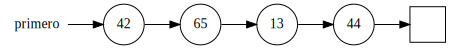

In [ ]:
L.dibujar()

42 65 88 13 44 


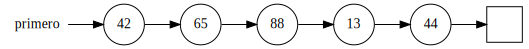

In [ ]:
L.insertar_despues_de(L.k_esimo(2),88)
L.imprimir()
L.dibujar()

65 88 13 44 


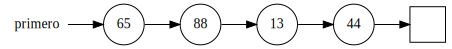

In [ ]:
L.eliminar_al_inicio()
L.imprimir()
L.dibujar()

65 13 44 


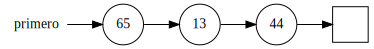

In [ ]:
L.eliminar_sgte_de(L.k_esimo(1))
L.imprimir()
L.dibujar()

---

Hay algunas cosas que no resultan muy elegantes en el diseño de listas que estamos considerando hasta el momento.

Una de ellas es que para eliminar un elemento, no se pueda indicar al elemento que se desea eliminar, sino que haya que indicar al previo. Esto es inevitable, dado el caracter unidireccional de los enlaces, y más adelante, cuando veamos _listas de doble enlace_ veremos que eso puede mejorarse.

Otro punto molesto en la interfaz de uso es la necesidad de distinguir entre si se opera al comienzo de la lista, o en un punto interior. Esto es porque las operaciones afectan al elemento previo, y el primero de la lista, por definición, no tiene un elemento previo.

Esto puede subsanarse, sin embargo, introduciendo un nodo "cabecera" ("*header*") al comienzo de la lista. Este nodo no contiene información útil y para todos los efectos es como si no existiera, excepto que sirve como el previo del primer nodo real de la lista. Para poder ubicarlo, lo identificaremos con el nodo "0-ésimo" de la lista.

![lista-ejemplo-con-cabecera](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/lista-ejemplo-con-cabecera.png?raw=1)

A continuación reescribimos nuestra definición de la clase `Lista` y sus ejemplos de uso, bajo el supuesto de que existe un nodo cabecera.

In [ ]:
class Lista_con_cabecera:
    def __init__(self):
        self.cabecera=Nodo(0,None)
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)
    
    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is None:
                return None
            j+=1
    
    def imprimir(self):
        p=self.cabecera.sgte
        while p is not None:
            print(p.info,end=" ")
            p=p.sgte
        print()

In [ ]:
L=Lista_con_cabecera()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
L.imprimir()

42 65 13 44 


In [ ]:
L.eliminar_sgte_de(L.k_esimo(0)) # eliminar el primero
L.imprimir()

65 13 44 


In [ ]:
print(L.k_esimo(7))

None


In [ ]:
L.eliminar_sgte_de(L.k_esimo(1)) # eliminar un elemento en el medio
L.imprimir()

65 44 


### Recorriendo la lista con un iterador

A continuación veremos cómo, en lugar de imprimir la lista, podemos implementar un iterador que vaya entregando los elementos de la lista cada vez que es llamado:

In [ ]:
class Lista_con_cabecera:
    def __init__(self):
        self.cabecera=Nodo(0,None)
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)
    
    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None
    
    def valores(self):
        p=self.cabecera.sgte
        while p is not None:
            yield p.info
            p=p.sgte

In [ ]:
L=Lista_con_cabecera()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)

In [ ]:
for x in L.valores():
    print(x, end=" ")
print()

42 65 13 44 


In [ ]:
print([x for x in L.valores()])

[42, 65, 13, 44]


## Listas de doble enlace

Las listas de enlace simple permiten solo procesos unidireccionales, por lo que no son muy apropiadas cuando los procesos necesitan poder recorrerlas en ambas dicecciones.

Podemos mejorar esto si agregamos a los nodos una referencia al nodo *previo*, además del nodo siguiente:

![Nodo-doble](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-doble.png?raw=1)

 

In [ ]:
class Nodo:
    def __init__(self, prev, info, sgte):
        self.prev=prev
        self.info=info
        self.sgte=sgte

Con este tipo de nodos podemos formar una lista que puede ser recorrida en ambas direcciones.
Por consideraciones similares a las anteriores, resulta conveniente agregar un nodo cabecera en cada extremo, pero en realidad un mismo nodo puede jugar ambos roles, con lo cual la lista adopta un aspecto físicamente circular, aunque desde un punto de vista conceptual no lo sea:

![lista-ejemplo-doble-enlace](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/lista-ejemplo-doble-enlace.png?raw=1)

La siguiente es una definición de lista de doble enlace, con alguna de la funcionalidad que ella permite:

In [ ]:
import aed_utilities as aed

class Lista_doble_enlace:
    def __init__(self):
        self.cabecera=Nodo(None,0,None)
        self.cabecera.prev=self.cabecera
        self.cabecera.sgte=self.cabecera
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        r=p.sgte
        p.sgte=r.prev=Nodo(p,info,r)
 
    def eliminar(self,p): # elimina el nodo p
        assert p is not self.cabecera
        (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is self.cabecera:
                return None
            j+=1
    
    def ascendente(self):
        p=self.cabecera.sgte
        while p is not self.cabecera:
            yield p.info
            p=p.sgte

    def descendente(self):
        p=self.cabecera.prev
        while p is not self.cabecera:
            yield p.info
            p=p.prev

    #Para dibujar una lista doblemente enlazada, es necesario además definir el nombre del campo del puntero hacia atrás.
    # El parámetro para definir ese campo es "fieldReverseLink". Por default, este campo es None.
    def dibujar(self):
      lld=aed.LinkedListDrawer(fieldHeader="cabecera", fieldData="info", fieldLink="sgte", fieldReverseLink="prev")
      lld.draw_double_linked_list(self)

[42, 65, 13, 44]
[44, 13, 65, 42]


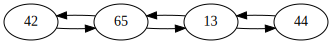

In [ ]:
L=Lista_doble_enlace()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
print([x for x in L.ascendente()])
print([x for x in L.descendente()])

L.dibujar()

[42, 65, 44]


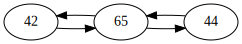

In [ ]:
L.eliminar(L.k_esimo(3))
print([x for x in L.ascendente()])

L.dibujar()

---